<a href="https://colab.research.google.com/github/devika1402/learning-pytorch/blob/main/MNIST_Digits_Classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

Defining the transformations to perform on the data before feeding it into the pipeline using torchvision.transforms:

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

**transforms.ToTensor()** — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor. <br><br>
**transforms.Normalize()** — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.


Downloading the data sets, shuffling them and transforming each of them. 

We download the data sets and load them to DataLoader, which combines the data-set and a sampler and provides single- or multi-process iterators over the data-set.

In [3]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

# batch size: no. of images to be read in one go

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



## Exploratory data analysis on the images and tensors

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


Shape of images: torch.Size([64,1,28,28]), which suggests that there are 64 images in each batch and each image has a dimension of 28 x 28 pixels. 

Similarly, the labels have a shape as torch.Size([64]).


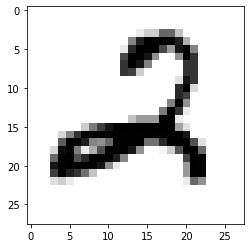

In [5]:
# Displaying the first image from the training set:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

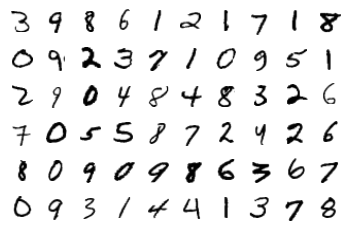

In [6]:
# Displaying more images:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Building The Neural Network

Contains an input layer (the first layer), an output layer of ten neurons (or units, the circles) and two hidden layers in between

In [7]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [8]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

## Adjusting Weights

A neural network *learns* by iterating multiple times over the available data. The terms learn refers to the adjustment of weights of the network to minimize the loss.

In [9]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 1.6236e-03,  1.6236e-03,  1.6236e-03,  ...,  1.6236e-03,
          1.6236e-03,  1.6236e-03],
        [ 7.1711e-05,  7.1711e-05,  7.1711e-05,  ...,  7.1711e-05,
          7.1711e-05,  7.1711e-05],
        [-1.4305e-05, -1.4305e-05, -1.4305e-05,  ..., -1.4305e-05,
         -1.4305e-05, -1.4305e-05],
        ...,
        [ 1.0820e-03,  1.0820e-03,  1.0820e-03,  ...,  1.0820e-03,
          1.0820e-03,  1.0820e-03],
        [ 3.1513e-04,  3.1513e-04,  3.1513e-04,  ...,  3.1513e-04,
          3.1513e-04,  3.1513e-04],
        [ 1.1352e-04,  1.1352e-04,  1.1352e-04,  ...,  1.1352e-04,
          1.1352e-04,  1.1352e-04]])


##Training the model

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6318323428728687
Epoch 1 - Training loss: 0.27944740073989704
Epoch 2 - Training loss: 0.21325514104955995
Epoch 3 - Training loss: 0.1717846625978981
Epoch 4 - Training loss: 0.1415016445845588
Epoch 5 - Training loss: 0.12092550979085219
Epoch 6 - Training loss: 0.10629047040464178
Epoch 7 - Training loss: 0.09491203336922853
Epoch 8 - Training loss: 0.0836180163694343
Epoch 9 - Training loss: 0.07646740712761593
Epoch 10 - Training loss: 0.07008046109868742
Epoch 11 - Training loss: 0.0631682483150737
Epoch 12 - Training loss: 0.05850586433262467
Epoch 13 - Training loss: 0.05401385054270278
Epoch 14 - Training loss: 0.0502626923119415

Training Time (in minutes) = 3.257788093884786


## Testing the model and evaluating it

In [11]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 7


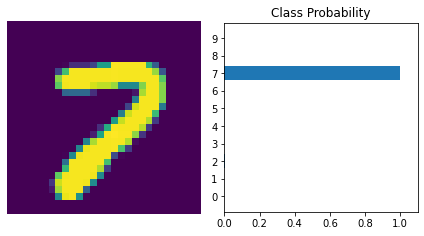

In [12]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Calculating accuracy

In [13]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9748


### Saving The Model


In [14]:
torch.save(model, './my_mnist_model.pt')